137 181 43 19
204 146 96 54
0 93 123 107
122 82 35 34
82 14 159 158
206 0 94 107


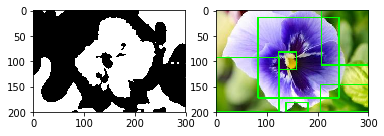

In [15]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ
img = cv2.imread("flower.jpeg")

# 色空間二値化
# １：グレースケールに
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#  ガウシアンフィルタで画面の平滑化
# ２：ぼかし処理
gray = cv2.GaussianBlur(gray, (7,7), 0)
# 3：二値化
# しきい値より大きい値0(maxvalue)それ以外240 しきい値140
# しきい値ret[0],しきい値処理後の画像thresh [1]= cv2.threshold
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 画面左側に二値化した画像を描画
plt.subplot(1,2,1)
plt.imshow(im2, cmap="gray")

# 輪郭抽出
# findContours(入力画像,抽出モード,近似手法)
# RETR_LIST：単純な輪郭抽出
# cv2.CHAIN_APPROX_SIMPLE：不必要な点を削る
cnts = cv2.findContours(im2, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[1]
# 色
green = (0,255,0)

# 抽出した枠を描画
for pt in cnts:
    # image,contours,hierarchy (輪郭データ）をx,y,w,h に変換
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎるor小さすぎる領域排除
    if w < 30 or w >200: continue
    print(x,y,w,h)
    cv2.rectangle(img,(x,y),(x + w,y + h),green,2)

# 画面の右側に抽出した結果を描画
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi = 200)
plt.show()



